**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [112]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 500)

import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.feature_extraction import DictVectorizer
seaborn.set_context('talk')

In [113]:
# Acá deberían leer el conjunto de datos que ya tienen.
df=pd.read_csv('melbourne_houses_final_df.csv')

df.drop(['BuildingArea','YearBuilt','antiguedad','CouncilArea'],axis=1,inplace=True)

df.head(2)

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount,SellerG,Suburb,date_month,date_year,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_weekly_price_count,airbnb_monthly_price_mean,airbnb_monthly_price_count
0,2,h,1035000.0,S,2016-02-04,2.5,3067.0,1.0,0.0,156.0,-37.8079,144.9934,Northern Metropolitan,4019.0,Biggin,Abbotsford,2,2016,3067.0,130.624031,258.0,605.152174,46.0,2187.032258,31.0
1,3,h,1465000.0,SP,2017-03-04,2.5,3067.0,2.0,0.0,134.0,-37.8093,144.9944,Northern Metropolitan,4019.0,Biggin,Abbotsford,3,2017,3067.0,130.624031,258.0,605.152174,46.0,2187.032258,31.0


In [148]:
df.shape

(7464, 25)

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [115]:
# Es importante no tener nulos para OneHotEncoder
df.isnull().sum()

Rooms                          0
Type                           0
Price                          0
Method                         0
Date                           0
Distance                       0
Postcode                       0
Bathroom                       0
Car                           28
Landsize                       0
Lattitude                      0
Longtitude                     0
Regionname                     0
Propertycount                  0
SellerG                        0
Suburb                         0
date_month                     0
date_year                      0
zipcode                        0
airbnb_price_mean              0
airbnb_record_count            0
airbnb_weekly_price_mean       0
airbnb_weekly_price_count      0
airbnb_monthly_price_mean      0
airbnb_monthly_price_count     0
dtype: int64

Seguimos teniendo valores nulos en la variable Car. Voy a imputarlos con la moda.

In [116]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy='most_frequent')

df.Car=imputer.fit_transform(df.Car.values.reshape(-1,1))

df.isnull().sum()

Rooms                         0
Type                          0
Price                         0
Method                        0
Date                          0
Distance                      0
Postcode                      0
Bathroom                      0
Car                           0
Landsize                      0
Lattitude                     0
Longtitude                    0
Regionname                    0
Propertycount                 0
SellerG                       0
Suburb                        0
date_month                    0
date_year                     0
zipcode                       0
airbnb_price_mean             0
airbnb_record_count           0
airbnb_weekly_price_mean      0
airbnb_weekly_price_count     0
airbnb_monthly_price_mean     0
airbnb_monthly_price_count    0
dtype: int64

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7464 entries, 0 to 7463
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rooms                       7464 non-null   int64  
 1   Type                        7464 non-null   object 
 2   Price                       7464 non-null   float64
 3   Method                      7464 non-null   object 
 4   Date                        7464 non-null   object 
 5   Distance                    7464 non-null   float64
 6   Postcode                    7464 non-null   float64
 7   Bathroom                    7464 non-null   float64
 8   Car                         7464 non-null   float64
 9   Landsize                    7464 non-null   float64
 10  Lattitude                   7464 non-null   float64
 11  Longtitude                  7464 non-null   float64
 12  Regionname                  7464 non-null   object 
 13  Propertycount               7464 

In [120]:
#Cambiamos el tipo de algunas variables

df.Rooms=df.Rooms.astype(str)
df.Car=df.Car.astype(str)
df.Method=df.Method.astype(str)
df.Postcode=df.Postcode.astype(str)
df.Bathroom=df.Bathroom.astype(str)
df.zipcode=df.zipcode.astype(str)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7464 entries, 0 to 7463
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rooms                       7464 non-null   object 
 1   Type                        7464 non-null   object 
 2   Price                       7464 non-null   float64
 3   Method                      7464 non-null   object 
 4   Date                        7464 non-null   object 
 5   Distance                    7464 non-null   float64
 6   Postcode                    7464 non-null   object 
 7   Bathroom                    7464 non-null   object 
 8   Car                         7464 non-null   object 
 9   Landsize                    7464 non-null   float64
 10  Lattitude                   7464 non-null   float64
 11  Longtitude                  7464 non-null   float64
 12  Regionname                  7464 non-null   object 
 13  Propertycount               7464 

### Get_dummies

In [122]:
cols_cat=['Rooms','Type','Method','Postcode','Bathroom','Car','Regionname','SellerG','Suburb','zipcode']

In [123]:
df_num=df.drop(cols_cat,axis=1)

In [151]:
df_dummies = pd.get_dummies(df,columns=cols_cat, drop_first=False)  #Sería similar a one hot encoding

df_dummies

,Price,Date,Distance,Landsize,Lattitude,Longtitude,Propertycount,date_month,date_year,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_weekly_price_count,airbnb_monthly_price_mean,airbnb_monthly_price_count,Rooms_1,Rooms_10,Rooms_2,Rooms_3,Rooms_4,Rooms_5,Rooms_6,Rooms_7,Rooms_8,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,Postcode_3000.0,Postcode_3002.0,Postcode_3003.0,Postcode_3006.0,Postcode_3011.0,Postcode_3012.0,Postcode_3013.0,Postcode_3015.0,Postcode_3016.0,Postcode_3018.0,Postcode_3019.0,Postcode_3020.0,Postcode_3021.0,Postcode_3023.0,Postcode_3024.0,Postcode_3025.0,Postcode_3027.0,Postcode_3028.0,Postcode_3029.0,Postcode_3030.0,Postcode_3031.0,Postcode_3032.0,Postcode_3033.0,Postcode_3037.0,Postcode_3039.0,Postcode_3040.0,Postcode_3042.0,Postcode_3043.0,Postcode_3044.0,Postcode_3046.0,Postcode_3047.0,Postcode_3049.0,Postcode_3051.0,Postcode_3052.0,Postcode_3053.0,Postcode_3054.0,Postcode_3055.0,Postcode_3056.0,Postcode_3057.0,Postcode_3058.0,Postcode_3059.0,Postcode_3064.0,Postcode_3065.0,Postcode_3066.0,Postcode_3067.0,Postcode_3068.0,Postcode_3070.0,Postcode_3071.0,Postcode_3072.0,Postcode_3073.0,Postcode_3074.0,Postcode_3076.0,Postcode_3078.0,Postcode_3079.0,Postcode_3081.0,Postcode_3082.0,Postcode_3083.0,Postcode_3084.0,Postcode_3088.0,Postcode_3095.0,Postcode_3101.0,Postcode_3102.0,Postcode_3103.0,Postcode_3104.0,Postcode_3105.0,Postcode_3106.0,Postcode_3107.0,Postcode_3108.0,Postcode_3109.0,Postcode_3113.0,Postcode_3116.0,Postcode_3121.0,Postcode_3122.0,Postcode_3123.0,Postcode_3124.0,Postcode_3125.0,Postcode_3126.0,Postcode_3127.0,Postcode_3128.0,Postcode_3130.0,Postcode_3131.0,Postcode_3132.0,Postcode_3133.0,Postcode_3134.0,Postcode_3135.0,Postcode_3136.0,Postcode_3138.0,Postcode_3141.0,Postcode_3142.0,Postcode_3143.0,Postcode_3144.0,Postcode_3145.0,Postcode_3146.0,Postcode_3147.0,Postcode_3148.0,Postcode_3149.0,Postcode_3150.0,Postcode_3151.0,Postcode_3152.0,Postcode_3153.0,Postcode_3155.0,Postcode_3156.0,Postcode_3161.0,Postcode_3162.0,Postcode_3163.0,Postcode_3165.0,Postcode_3166.0,Postcode_3167.0,Postcode_3168.0,Postcode_3169.0,Postcode_3170.0,Postcode_3171.0,Postcode_3172.0,Postcode_3173.0,Postcode_3174.0,Postcode_3175.0,Postcode_3178.0,Postcode_3179.0,Postcode_3181.0,Postcode_3182.0,Postcode_3183.0,Postcode_3184.0,Postcode_3185.0,Postcode_3186.0,Postcode_3187.0,Postcode_3188.0,Postcode_3189.0,Postcode_3190.0,Postcode_3191.0,Postcode_3192.0,Postcode_3193.0,Postcode_3194.0,Postcode_3195.0,Postcode_3196.0,Postcode_3197.0,Postcode_3198.0,Postcode_3199.0,Postcode_3204.0,Postcode_3205.0,Postcode_3206.0,Postcode_3207.0,Postcode_3337.0,Postcode_3338.0,Postcode_3429.0,Postcode_3752.0,Postcode_3754.0,Postcode_3775.0,Postcode_3777.0,Postcode_3782.0,Postcode_3802.0,Postcode_3805.0,Postcode_3806.0,Postcode_3809.0,Postcode_3810.0,Postcode_3977.0,Bathroom_0.0,Bathroom_1.0,Bathroom_2.0,Bathroom_3.0,Bathroom_4.0,Bathroom_5.0,Bathroom_6.0,Bathroom_8.0,Car_0.0,Car_1.0,Car_10.0,Car_2.0,Car_3.0,Car_4.0,Car_5.0,Car_6.0,Car_7.0,Car_8.0,Car_9.0,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,SellerG_@Realty,SellerG_ASL,SellerG_Abercromby's,SellerG_Alexkarbon,SellerG_Allens,SellerG_Anderson,SellerG_Appleby,SellerG_Aquire,SellerG_Ascend,SellerG_Ash,SellerG_Australian,SellerG_Barlow,SellerG_Barry,SellerG_Bayside,SellerG_Bekdon,SellerG_Beller,SellerG_Bells,SellerG_Besser,SellerG_Biggin,SellerG_Bowman,SellerG_Brace,SellerG_Brad,SellerG_Buckingham,SellerG_Bullen,SellerG_Burnham,SellerG_Buxton,SellerG_Buxton/Advantage,SellerG_Buxton/Find,SellerG_C21,SellerG_Caine,SellerG_Carter,SellerG_Castran,SellerG_Cayzer,SellerG_Century,SellerG_Chambers,SellerG_Charlton,...,Suburb_Mont Albert,Suburb_Moonee Ponds,Suburb_Moorabbin,Suburb_Mooroolbark,Suburb_Mordialloc,Suburb_Mount Waverley,Suburb_Mulgrav

### One Hot encoding

In [125]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse=False)

encoder.fit(df[cols_cat])

df_onehot=encoder.transform(df[cols_cat])

df_onehot=pd.DataFrame(df_onehot,columns=encoder.get_feature_names())

df_onehot=pd.concat([df_onehot,df_num],axis=1)

In [126]:
df_onehot

,x0_1,x0_10,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,x0_8,x1_h,x1_t,x1_u,x2_PI,x2_S,x2_SA,x2_SP,x2_VB,x3_3000.0,x3_3002.0,x3_3003.0,x3_3006.0,x3_3011.0,x3_3012.0,x3_3013.0,x3_3015.0,x3_3016.0,x3_3018.0,x3_3019.0,x3_3020.0,x3_3021.0,x3_3023.0,x3_3024.0,x3_3025.0,x3_3027.0,x3_3028.0,x3_3029.0,x3_3030.0,x3_3031.0,x3_3032.0,x3_3033.0,x3_3037.0,x3_3039.0,x3_3040.0,x3_3042.0,x3_3043.0,x3_3044.0,x3_3046.0,x3_3047.0,x3_3049.0,x3_3051.0,x3_3052.0,x3_3053.0,x3_3054.0,x3_3055.0,x3_3056.0,x3_3057.0,x3_3058.0,x3_3059.0,x3_3064.0,x3_3065.0,x3_3066.0,x3_3067.0,x3_3068.0,x3_3070.0,x3_3071.0,x3_3072.0,x3_3073.0,x3_3074.0,x3_3076.0,x3_3078.0,x3_3079.0,x3_3081.0,x3_3082.0,x3_3083.0,x3_3084.0,x3_3088.0,x3_3095.0,x3_3101.0,x3_3102.0,x3_3103.0,x3_3104.0,x3_3105.0,x3_3106.0,x3_3107.0,x3_3108.0,x3_3109.0,x3_3113.0,x3_3116.0,x3_3121.0,x3_3122.0,x3_3123.0,x3_3124.0,x3_3125.0,x3_3126.0,x3_3127.0,x3_3128.0,x3_3130.0,x3_3131.0,x3_3132.0,x3_3133.0,x3_3134.0,x3_3135.0,x3_3136.0,x3_3138.0,x3_3141.0,x3_3142.0,x3_3143.0,x3_3144.0,x3_3145.0,x3_3146.0,x3_3147.0,x3_3148.0,x3_3149.0,x3_3150.0,x3_3151.0,x3_3152.0,x3_3153.0,x3_3155.0,x3_3156.0,x3_3161.0,x3_3162.0,x3_3163.0,x3_3165.0,x3_3166.0,x3_3167.0,x3_3168.0,x3_3169.0,x3_3170.0,x3_3171.0,x3_3172.0,x3_3173.0,x3_3174.0,x3_3175.0,x3_3178.0,x3_3179.0,x3_3181.0,x3_3182.0,x3_3183.0,x3_3184.0,x3_3185.0,x3_3186.0,x3_3187.0,x3_3188.0,x3_3189.0,x3_3190.0,x3_3191.0,x3_3192.0,x3_3193.0,x3_3194.0,x3_3195.0,x3_3196.0,x3_3197.0,x3_3198.0,x3_3199.0,x3_3204.0,x3_3205.0,x3_3206.0,x3_3207.0,x3_3337.0,x3_3338.0,x3_3429.0,x3_3752.0,x3_3754.0,x3_3775.0,x3_3777.0,x3_3782.0,x3_3802.0,x3_3805.0,x3_3806.0,x3_3809.0,x3_3810.0,x3_3977.0,x4_0.0,x4_1.0,x4_2.0,x4_3.0,x4_4.0,x4_5.0,x4_6.0,x4_8.0,x5_0.0,x5_1.0,x5_10.0,x5_2.0,x5_3.0,x5_4.0,x5_5.0,x5_6.0,x5_7.0,x5_8.0,x5_9.0,x6_Eastern Metropolitan,x6_Eastern Victoria,x6_Northern Metropolitan,x6_Northern Victoria,x6_South-Eastern Metropolitan,x6_Southern Metropolitan,x6_Western Metropolitan,x6_Western Victoria,x7_@Realty,x7_ASL,x7_Abercromby's,x7_Alexkarbon,x7_Allens,x7_Anderson,x7_Appleby,x7_Aquire,x7_Ascend,x7_Ash,x7_Australian,x7_Barlow,x7_Barry,x7_Bayside,x7_Bekdon,x7_Beller,x7_Bells,x7_Besser,x7_Biggin,x7_Bowman,x7_Brace,x7_Brad,x7_Buckingham,x7_Bullen,x7_Burnham,x7_Buxton,x7_Buxton/Advantage,x7_Buxton/Find,x7_C21,x7_Caine,x7_Carter,x7_Castran,x7_Cayzer,x7_Century,x7_Chambers,x7_Charlton,x7_Chisholm,x7_Christopher,x7_Clairmont,x7_Collins,x7_Compton,x7_Considine,x7_D'Aprano,x7_Darren,x7_Del,x7_Dingle,x7_Direct,x7_Dixon,x7_Domain,x7_Douglas,x7_Edward,...,x8_Notting Hill,x8_Nunawading,x8_Oak Park,x8_Oakleigh,x8_Oakleigh East,x8_Oakleigh South,x8_Officer,x8_Ormond,x8_Pakenham,x8_Parkdale,x8_Parkville,x8_Pascoe Vale,x8_Point Cook,x8_Port Melbourne,x8_Prahran,x8_Preston,x8_Princes Hill,x8_Reservoir,x8_Richmond,x8_Ringwood,x8_Ringwood East,x8_Ringwood North,x8_Ripponlea,x8_Rosanna,x8_Rowville,x8_Roxburgh Park,x8_Sandhurst,x8_Sandringham,x8_Scoresby,x8_Seabrook,x8_Seaford,x8_Seaholme,x8_Seddon,x8_Skye,x8_South Kingsville,x8_South Melbourne,x8_South Morang,x8_South Yarra,x8_Southbank,x8_Spotswood,x8_Springvale,x8_Springvale South,x8_St Albans,x8_St Helena,x8_St Kilda,x8_Sunbury,x8_Sunshine,x8_Sunshine North,x8_Sunshine West,x8_Surrey Hills,x8_Sydenham,x8_Tarneit,x8_Taylors Hill,x8_Templestowe,x8_Templestowe Lower,x8_Thomastown,x8_Thornbury,x8_Toorak,x8_Travancore,x8_Truganina,x8_Tullamarine,x8_Vermont,x8_Vermont South,x8_Viewbank,x8_Wantirna,x8_Wantirna South,x8_Warrandyte,x8_Waterways,x8_Werribee,x8_West Footscray,x8_West Melbourne,x8_Westmeadows,x8_Wheelers Hill,x8_Williams Landing,x8_Williamstown,x8_Williamstown North,x8_Windsor,x8_Wyndham Vale,x8_Yarra Glen,x8_Yarraville,x9_3000.0,x9_3002.0,x9_3003.0,x9_3006.0,x9_3011.0,x9_3012.0,x9_3013.0,x9_3015.0,x9_3016.0,x9_3018.0,x9_3019.0,x9_3020.0,x9_3021.0,x9_3023.0,x9_3024.0,x9_3025.0,x9_3027.0,x9_3028.0,x9_3029.0,x9_3030.0,x9_3031.0,x9_3032.0,x9_3033.0,x9_3037.0,x9_3039.0,x9_3040.0,x9_3042.0,x9_3043.0,x9_3044.0,x9_3046.0,x9_3047.0,x9_3049.0,x9_3051.0,x9_3052.0,x9

### DimVectorizer

In [143]:
dict_cat=list(df[cols_cat].T.to_dict().values())
dict_cat[:2]

[{'Rooms': '2',
  'Type': 'h',
  'Method': 'S',
  'Postcode': '3067.0',
  'Bathroom': '1.0',
  'Car': '0.0',
  'Regionname': 'Northern Metropolitan',
  'SellerG': 'Biggin',
  'Suburb': 'Abbotsford',
  'zipcode': '3067.0'},
 {'Rooms': '3',
  'Type': 'h',
  'Method': 'SP',
  'Postcode': '3067.0',
  'Bathroom': '2.0',
  'Car': '0.0',
  'Regionname': 'Northern Metropolitan',
  'SellerG': 'Biggin',
  'Suburb': 'Abbotsford',
  'zipcode': '3067.0'}]

In [144]:
vec=DictVectorizer()
df_cat=vec.fit_transform(dict_cat)
df_cat

<7464x828 sparse matrix of type '<class 'numpy.float64'>'
	with 74640 stored elements in Compressed Sparse Row format>

In [145]:
vec.get_feature_names()[:5]

['Bathroom=0.0',
 'Bathroom=1.0',
 'Bathroom=2.0',
 'Bathroom=3.0',
 'Bathroom=4.0']

In [146]:
df_cat=df_cat.todense()
df_cat=pd.DataFrame(df_cat,columns=vec.get_feature_names())

df_dimvect=pd.concat([df_num,df_cat],axis=1)

In [147]:
df_dimvect

,Price,Date,Distance,Landsize,Lattitude,Longtitude,Propertycount,date_month,date_year,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_weekly_price_count,airbnb_monthly_price_mean,airbnb_monthly_price_count,Bathroom=0.0,Bathroom=1.0,Bathroom=2.0,Bathroom=3.0,Bathroom=4.0,Bathroom=5.0,Bathroom=6.0,Bathroom=8.0,Car=0.0,Car=1.0,Car=10.0,Car=2.0,Car=3.0,Car=4.0,Car=5.0,Car=6.0,Car=7.0,Car=8.0,Car=9.0,Method=PI,Method=S,Method=SA,Method=SP,Method=VB,Postcode=3000.0,Postcode=3002.0,Postcode=3003.0,Postcode=3006.0,Postcode=3011.0,Postcode=3012.0,Postcode=3013.0,Postcode=3015.0,Postcode=3016.0,Postcode=3018.0,Postcode=3019.0,Postcode=3020.0,Postcode=3021.0,Postcode=3023.0,Postcode=3024.0,Postcode=3025.0,Postcode=3027.0,Postcode=3028.0,Postcode=3029.0,Postcode=3030.0,Postcode=3031.0,Postcode=3032.0,Postcode=3033.0,Postcode=3037.0,Postcode=3039.0,Postcode=3040.0,Postcode=3042.0,Postcode=3043.0,Postcode=3044.0,Postcode=3046.0,Postcode=3047.0,Postcode=3049.0,Postcode=3051.0,Postcode=3052.0,Postcode=3053.0,Postcode=3054.0,Postcode=3055.0,Postcode=3056.0,Postcode=3057.0,Postcode=3058.0,Postcode=3059.0,Postcode=3064.0,Postcode=3065.0,Postcode=3066.0,Postcode=3067.0,Postcode=3068.0,Postcode=3070.0,Postcode=3071.0,Postcode=3072.0,Postcode=3073.0,Postcode=3074.0,Postcode=3076.0,Postcode=3078.0,Postcode=3079.0,Postcode=3081.0,Postcode=3082.0,Postcode=3083.0,Postcode=3084.0,Postcode=3088.0,Postcode=3095.0,Postcode=3101.0,Postcode=3102.0,Postcode=3103.0,Postcode=3104.0,Postcode=3105.0,Postcode=3106.0,Postcode=3107.0,Postcode=3108.0,Postcode=3109.0,Postcode=3113.0,Postcode=3116.0,Postcode=3121.0,Postcode=3122.0,Postcode=3123.0,Postcode=3124.0,Postcode=3125.0,Postcode=3126.0,Postcode=3127.0,Postcode=3128.0,Postcode=3130.0,Postcode=3131.0,Postcode=3132.0,Postcode=3133.0,Postcode=3134.0,Postcode=3135.0,Postcode=3136.0,Postcode=3138.0,Postcode=3141.0,Postcode=3142.0,Postcode=3143.0,Postcode=3144.0,Postcode=3145.0,Postcode=3146.0,Postcode=3147.0,Postcode=3148.0,Postcode=3149.0,Postcode=3150.0,Postcode=3151.0,Postcode=3152.0,Postcode=3153.0,Postcode=3155.0,Postcode=3156.0,Postcode=3161.0,Postcode=3162.0,Postcode=3163.0,Postcode=3165.0,Postcode=3166.0,Postcode=3167.0,Postcode=3168.0,Postcode=3169.0,Postcode=3170.0,Postcode=3171.0,Postcode=3172.0,Postcode=3173.0,Postcode=3174.0,Postcode=3175.0,Postcode=3178.0,Postcode=3179.0,Postcode=3181.0,Postcode=3182.0,Postcode=3183.0,Postcode=3184.0,Postcode=3185.0,Postcode=3186.0,Postcode=3187.0,Postcode=3188.0,Postcode=3189.0,Postcode=3190.0,Postcode=3191.0,Postcode=3192.0,Postcode=3193.0,Postcode=3194.0,Postcode=3195.0,Postcode=3196.0,Postcode=3197.0,Postcode=3198.0,Postcode=3199.0,Postcode=3204.0,Postcode=3205.0,Postcode=3206.0,Postcode=3207.0,Postcode=3337.0,Postcode=3338.0,Postcode=3429.0,Postcode=3752.0,Postcode=3754.0,Postcode=3775.0,Postcode=3777.0,Postcode=3782.0,Postcode=3802.0,Postcode=3805.0,Postcode=3806.0,Postcode=3809.0,Postcode=3810.0,Postcode=3977.0,Regionname=Eastern Metropolitan,Regionname=Eastern Victoria,Regionname=Northern Metropolitan,Regionname=Northern Victoria,Regionname=South-Eastern Metropolitan,Regionname=Southern Metropolitan,Regionname=Western Metropolitan,Regionname=Western Victoria,Rooms=1,Rooms=10,Rooms=2,Rooms=3,Rooms=4,Rooms=5,Rooms=6,Rooms=7,Rooms=8,SellerG=@Realty,SellerG=ASL,SellerG=Abercromby's,SellerG=Alexkarbon,SellerG=Allens,SellerG=Anderson,SellerG=Appleby,SellerG=Aquire,SellerG=Ascend,SellerG=Ash,SellerG=Australian,SellerG=Barlow,SellerG=Barry,SellerG=Bayside,SellerG=Bekdon,SellerG=Beller,SellerG=Bells,SellerG=Besser,SellerG=Biggin,SellerG=Bowman,SellerG=Brace,SellerG=Brad,SellerG=Buckingham,SellerG=Bullen,SellerG=Burnham,SellerG=Buxton,SellerG=Buxton/Advantage,SellerG=Buxton/Find,SellerG=C21,SellerG=Caine,SellerG=Carter,SellerG=Castran,SellerG=Cayzer,SellerG=Century,SellerG=Chambers,SellerG=Charlton,SellerG=Chisholm,SellerG=Christopher,SellerG=Clairmont,...,Suburb=Mooroolbark,Suburb=Mordialloc,Suburb=Mount Waverley,Suburb=Mulgrave,Suburb=Murrumbeena,S

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = melb_df.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

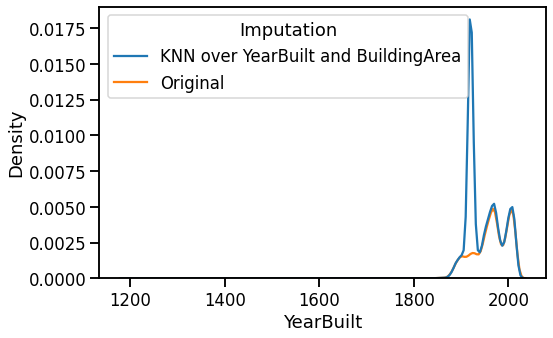

In [ ]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_year_build = melb_df.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pandas.concat([mice_year_built, melb_year_build])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
categorical_cols = ['Type', 'Regionname']
numerical_cols = ['Rooms', 'Distance']
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])

## Re-build dataframe
processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

Matrix has shape (13580, 11), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Eastern Victoria', 'Regionname=Northern Metropolitan', 'Regionname=Northern Victoria', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Western Metropolitan', 'Regionname=Western Victoria']
Matrix has shape (13580, 11), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Eastern Victoria', 'Regionname=Northern Metropolitan', 'Regionname=Northern Victoria', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Western Metropolitan', 'Regionname=Western Victoria', 'Rooms', 'Distance']


,Type=h,Type=t,Type=u,Regionname=Eastern Metropolitan,Regionname=Eastern Victoria,Regionname=Northern Metropolitan,Regionname=Northern Victoria,Regionname=South-Eastern Metropolitan,Regionname=Southern Metropolitan,Regionname=Western Metropolitan,Regionname=Western Victoria,Rooms,Distance,pca1,pca2
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.5,-7.669418,-0.292703
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.5,-7.669418,-0.292703
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.5,-7.620201,0.619633
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.5,-7.620201,0.619633
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.5,-7.570984,1.531969


## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
